## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [4]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('LoanStatus - LoanStatus.csv')

In [54]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,349.0,360.0,1.0,Semiurban,N


In [6]:
df.columns #გამოვიტანე სვეტების სახელები

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [8]:
df['ApplicantIncome'].mode()

0    2500
Name: ApplicantIncome, dtype: int64

describe() ფუნქციით დავბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები. count- გვიჩვენებს თუ რამდენი აპლიკანტია 'ApplicantIncome' სვეტში, mean - არის საშუალო(მონაცემთა მნიშვნელობების ჯამი გაყოფილი მათ რაოდენობაზე)max და min - მაქსიმალური და მინიმალური მნიშვნელობები. std - სტანდარტული გადახრა არის საზომი, თუ რამდენად გაფანტულია მონაცემები საშუალოსთან მიმართებაში(მცირე/დაბალი მიგვითითებს, რომ მონაცემები უფრო მჭიდროდაა დაჯგიფებული საშუალოსთნ მიმართებაში, ხოლო მაღალი/დიდი სტდ-ს დროს პირიქით, გაფანტულია).25%(Q1, პირვლი ინტერკვარტიული რეგიონი)ეს არის მნიშვნელობა, რომლის ქვემოთ მოდის მონაცემების 25%. სხვა სიტყვებით რომ ვთქვათ, მონაცემთა წერტილების 25% ნაკლებია ან ტოლია ამ მნიშვნელობაზე. ეს მიუთითებს მონაცემთა შუა 50%-ის ქვედა ზღვარზე. 50%(Q2, მედიანა) ეს არის მონაცემთა ნაკრების საშუალო მნიშვნელობა, როდესაც ის დალაგებულია ზრდადობით.იგი ასევე ცნობილია, როგორც მედიანა და ყოფს მონაცემთა ბაზას ორ თანაბარ ნაწილად. 75%(Q3,მესამე ინტერკვარტიული რეგიონი ) მონაცემთა პუნქტების 75% ნაკლებია ან ტოლია ამ მნიშვნელობაზე. ეს მიუთითებს მონაცემთა შუა 50%-ის ზედა ზღვარზე.describe()-ს არ გამოაქვს მოდა, ამიტომ ცალკე გამოვიტანე, ასევე შესაძლებელია mode() -ს მსგავსად std(), median(), mean(), max(), და სხვა ფუნქციების ცალკე გამოყენება. 

In [9]:
df.isna().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

isna()- არის 'True', თუ შესაბამისი ელემენტი df-ში არის NaN, სხვა შემთხვევაში  'False'.sum()- ით კი ვითვლი ჯამს, სადაც მნიშვნელობა იყო ჭეშმარიტი.შედეგში გამოტანილია სვეტების დასახელბები და გვერდით უწერია თუ რამდენი ნულოვანი მნიშვნელობაა შესაბამის სვეტში.

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [22]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

გვიჩვენებს თითოეული კატეგორიის პროპორციას მითითებულ სვეტში.

In [24]:
filt_ls = df['Loan_Status'] == 'Y'
n_Loan_Status = df[filt_ls]['Loan_Status'].count()
total = df['Loan_Status'].count()
p = n_Loan_Status/total
p

0.6872964169381107

აქ ფილტრაციას ვიყენებ და გამომაქვს მხოლოდ სადაც სვეტის მნჯშვნელობა'Y'-ია იმის პროპორციულობა.

In [66]:
filt_ch = df['Credit_History'] == 1.0
n_ch = df[filt_ch]['Credit_History'].count()
filt2 = (df['Credit_History'] == 1.0) & (df['Loan_Status'] == 'Y')
total_filt2 = df[filt2]['Loan_Status'].count()
p2 = total_filt2/n_ch
p

0.6872964169381107

ეს ნიშნავს, რომ 1.0 საკრედიტო ისტორიის მქონე აპლიკანტთა დაახლოებით 68.73% დამტკიცებული იყო სესხზე.

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

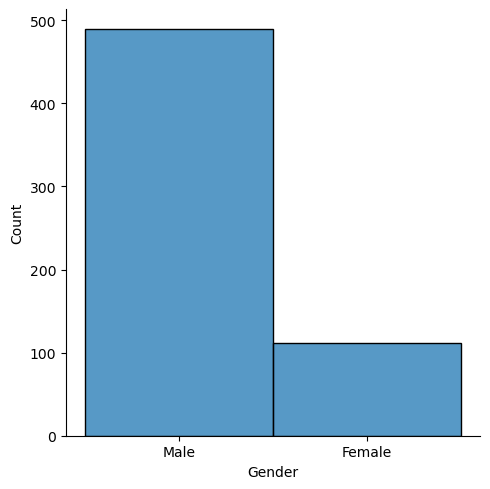

In [20]:
sns.displot(data=df, x='Gender')
plt.show() #სქესის მიხედვით აპლიკანტთა რაოდენობა

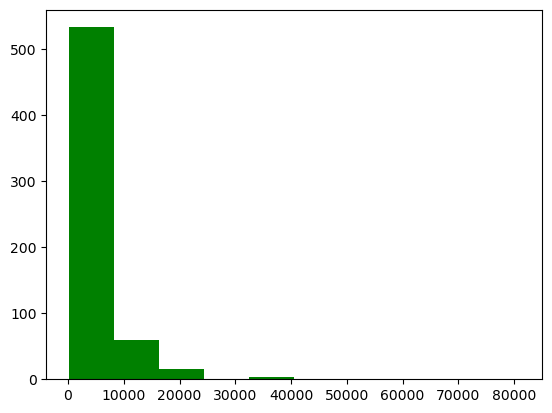

In [29]:
n_bins = 10 # 10 სვეტად 
x = df.ApplicantIncome
plt.hist(x, n_bins, color = 'green',)
plt.show()

x პარამეტრი წარმოადგენს მონაცემებს, რომლებიც მინდა რომ გამოვსახო ჰისტოგრამის სახით, n_bins - პარამეტრი განსაზღვრავს bin-ების რაოდენობას,რომლებშიც დაიყო ონაცემები.

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [30]:
from scipy.stats import norm

In [34]:
x = 2000
mean_val = df['ApplicantIncome'].mean()
std_dev_val =df['ApplicantIncome'].std()
norm.cdf(x, mean_val, std_dev_val)*100

28.872328177095575

აპლიკანტების დაახლოებით 28.87%-ს აქვს $2000 ან ნაკლები შემოსავალი

## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

<Axes: xlabel='ApplicantIncome'>

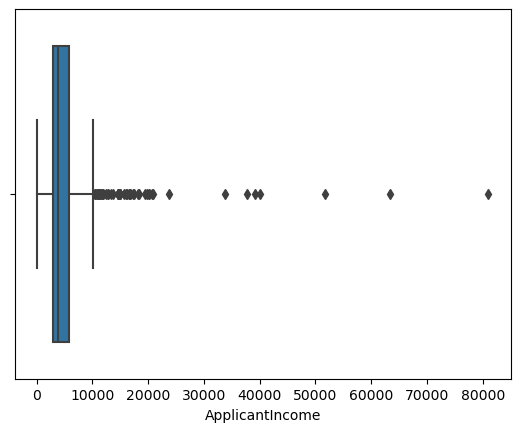

In [39]:
sns.boxplot(x=df['ApplicantIncome'])

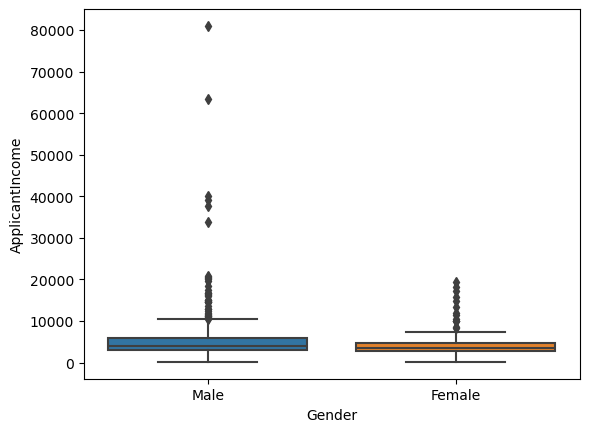

In [44]:
sns.boxplot(x='Gender', y='ApplicantIncome', data=df)

plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [6]:
from scipy.stats import ttest_1samp,ttest_ind

In [7]:
geo_income = 1662
incomes = df['ApplicantIncome']

In [8]:
t_statistic, pvalue = ttest_1samp(incomes, geo_income)

In [9]:
t_statistic

15.175818408216603

In [10]:
pvalue

2.1393037377020536e-44

In [15]:
alpha = 0.05 
if pvalue < alpha:
    print(f"Reject null hypothesis.")
else:
    print(f"Accept null hypothesis.")

Reject null hypothesis.


p მნიშვნელობა არის 5%-ზე ნაკლები ასე რომ, სტატისტიკური გადაწყვეტილება არის ნულოვანი ჰიპოთეზის უარყოფა მნიშვნელობის 5%-იან დონეზე.

In [17]:
data_group1 = df[df['Gender'] == 'Female']['ApplicantIncome']
 
data_group2 = df[df['Gender'] == 'Male']['ApplicantIncome']
print(data_group1.mean(), data_group2.mean())
 
ttest_ind(data_group1, data_group2)

4643.473214285715 5446.460122699386


TtestResult(statistic=-1.3232838129163134, pvalue=0.1862458823522394, df=599.0)

In [18]:
if pvalue < alpha:
    print(f"Reject null hypothesis.")
else:
    print(f"Accept null hypothesis.")

Reject null hypothesis.


In [ ]:
აქ, რადგან p-მნიშვნელობა (0.1862458823522394) ანაკლებია ალფა = 0.05-ზე, ამიტომ ნულოვანი ჰიპოთეზა დარეჯექთდა.